# Entrega 3 Aprendizaje Automático K-Means

Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co  
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co    
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co  
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co  
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático
Docente: Lucia Quintero - oquinte1@eafit.edu.co  
05 de noviembre de 2019<br>

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
import random

'''Data Viz'''
import matplotlib.pyplot as plt #mpl
from matplotlib import style
style.use('ggplot')
import seaborn as sns #sb
color = sns.color_palette()
import matplotlib as mpl
import pandas_profiling
# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score, pairwise_distances_argmin_min
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist


import warnings
warnings.filterwarnings("ignore")

# breast-cancer-wisconsin

In [2]:
#cargar los datos
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
d1=pd.read_csv(url,header=None)

#Este código remplaza ? en la columna 6 primero con valor na value para la columna A7 
colno=6
d1[colno].replace('?',np.nan,inplace=True)
d1[colno]=d1[colno].astype(float)
# Tomando los datos para el cluster escoger la variable dependiente
df1 = d1.iloc[:,1:10]

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario
columnname=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion'
             ,'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
col_mask=df1.isnull().any(axis=0) 
row_mask=df1.isnull().any(axis=1)
df1.loc[row_mask,col_mask]
df1=np.nan_to_num(df1)
df1 = pd.DataFrame(df1,columns=columnname)
df1.shape
X1 = df1 #X.shape
y1 = d1.iloc[:,10]

In [3]:
#Estandarizar
sc1=StandardScaler() 
sc1.fit(X1)
X1_std=sc1.transform(X1)

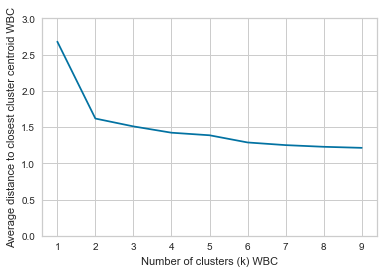

In [4]:
#Escoger k
distance_to_closter_cluster_centre = []
for k in range(1,10):
    kmeans1 = KMeans(n_clusters=k)  
    kmeans1.fit(X1_std)
    distance1 = np.min(kmeans1.transform(X1_std),axis=1)
    average_distance1 = np.mean(distance1)
    distance_to_closter_cluster_centre.append(average_distance1)

clusters1 = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters1, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) WBC')
plt.ylabel('Average distance to closest cluster centroid WBC')
plt.ylim(0,3)
plt.show()

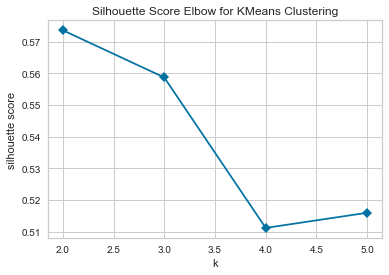

In [5]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans1, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X1_std)    
visualizer.poof()

In [6]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans1 = KMeans(n_clusters=2, random_state=random_state)
y_pred = kmeans1.fit_predict(X1_std) 
kmeans1.fit(X1_std)  
print('\nCluster centres WBC:')
print(kmeans1.cluster_centers_)


Cluster centres WBC:
[[ 0.98485132  1.20997804  1.19900927  1.03034277  1.01959796  1.15609936
   1.08677975  1.05909024  0.60768878]
 [-0.49242566 -0.60498902 -0.59950463 -0.51517139 -0.50979898 -0.57804968
  -0.54338987 -0.52954512 -0.30384439]]


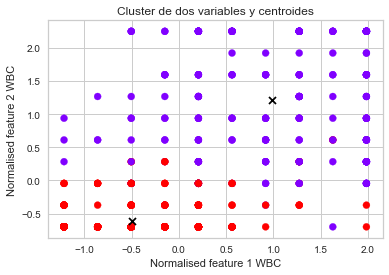

In [7]:
#grafica de las columnas 1 y 2 
labels1 = kmeans1.labels_

plt.scatter(X1_std[:,0],X1_std[:,1],c=labels1, cmap=plt.cm.rainbow)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('Normalised feature 1 WBC')
plt.ylabel('Normalised feature 2 WBC')
plt.show() 


In [8]:
# Calculate silhouette_score
print(silhouette_score(X1_std, kmeans1.labels_))

0.5736174194842412


# Iris

In [9]:
#cargar los datos
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url,header=None)
X2 = iris.iloc[:, [0,1,2,3]] #X2 = iris.iloc[:, :3]
y2=iris.iloc[:,4]
y2.columns={'label'}
y2[y2=='Iris-setosa']=1
y2[y2=='Iris-versicolor']=2
y2[y2=='Iris-virginica']=3
#Estandarizar
sc2=StandardScaler() 
sc2.fit(X2)
X2_std=sc2.transform(X2)

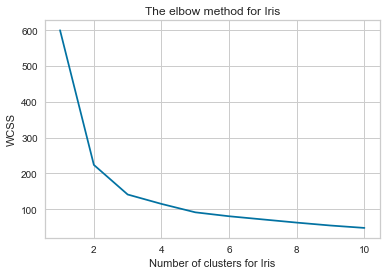

In [10]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans2.fit(X2_std)
    wcss.append(kmeans2.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for Iris')
plt.xlabel('Number of clusters for Iris')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

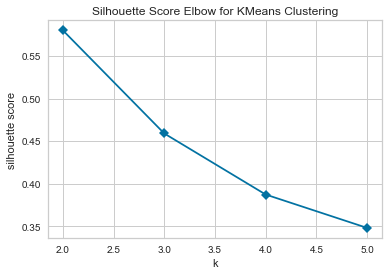

In [11]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans2, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X2_std)    
visualizer.poof()

Text(0, 0.5, 'Sepal Width')

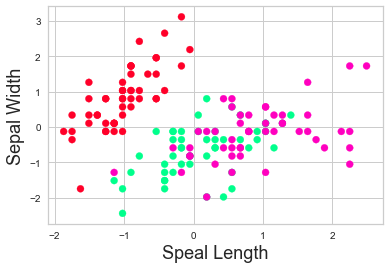

In [12]:
plt.scatter(X2_std[:,0], X2_std[:,1], c=y2, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [13]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, n_jobs = 4, random_state=21)
y_kmeans2 = kmeans2.fit_predict(X2_std)
centers2 = kmeans2.cluster_centers_
print('\nCluster centres:')
print(centers2)


Cluster centres:
[[-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]]


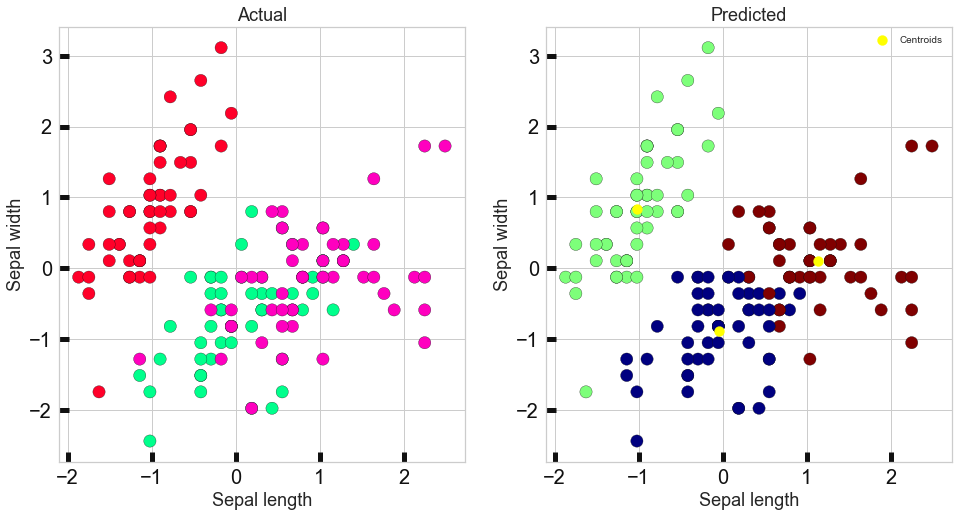

In [14]:
#this will tell us to which cluster does the data observations belong.
new_label2s = kmeans2.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X2_std[:, 0], X2_std[:, 1], c=y2, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X2_std[:, 0], X2_std[:, 1], c=new_label2s, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(centers2[:, 0], centers2[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [15]:
print(silhouette_score(X2_std, kmeans2.labels_))

0.4589717867018717


#  Thyroid Dataset

In [16]:
#cargar los datos https://github.com/mikeizbicki/datasets/blob/master/csv/uci/new-thyroid.names
url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data"
d3=pd.read_csv(url,header=None)

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario
columnname=['Class','T3-resin','T_Serum_thyroxin','T_serum_triiodothyronine','TSH','max_TSH']
col_mask=d3.isnull().any(axis=0) 
row_mask=d3.isnull().any(axis=1)
d3.loc[row_mask,col_mask]
df3=np.nan_to_num(d3)
df3 = pd.DataFrame(df3,columns=columnname)
df3.shape
X3 = df3.iloc[:,1:] #X.shape
y3 = d3.iloc[:,0]

9. Class Distribution: number of instances per class

	Class 1: (normal)	150  
	Class 2: (hyper)	35  
	Class 3: (hypo)		30  

In [17]:
#Estandarizar
sc3=StandardScaler() 
sc3.fit(X3)
X3_std=sc3.transform(X3) #array

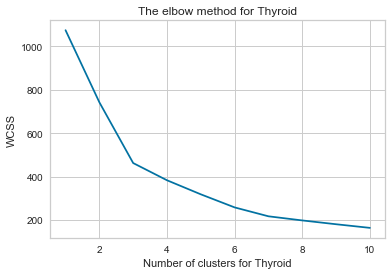

In [18]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans3.fit(X3_std)
    wcss.append(kmeans3.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for Thyroid')
plt.xlabel('Number of clusters for Thyroid')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

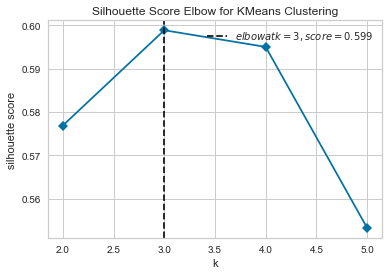

In [19]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans3, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X3_std)    
visualizer.poof()

Text(0, 0.5, 'T_serum_triiodothyronine')

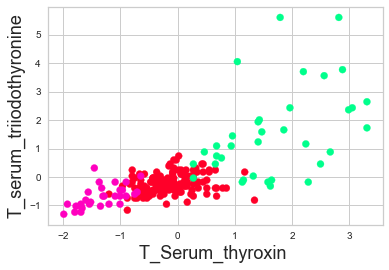

In [20]:
plt.scatter(X3_std[:,1], X3_std[:,2], c=y3, cmap='gist_rainbow')
plt.xlabel('T_Serum_thyroxin ', fontsize=18)
plt.ylabel('T_serum_triiodothyronine', fontsize=18)

In [21]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, n_jobs = 4, random_state=21)
y_kmeans3 = kmeans3.fit_predict(X3_std)
centers3 = kmeans3.cluster_centers_
print('\nCluster centres:')
print(centers3)


Cluster centres:
[[ 1.171131   -1.41901452 -0.75122363  2.27906235  2.09565666]
 [-2.17084975  2.25685847  2.81991946 -0.30493369 -0.5284977 ]
 [ 0.0506707  -0.02763512 -0.16153554 -0.25570866 -0.2127033 ]]


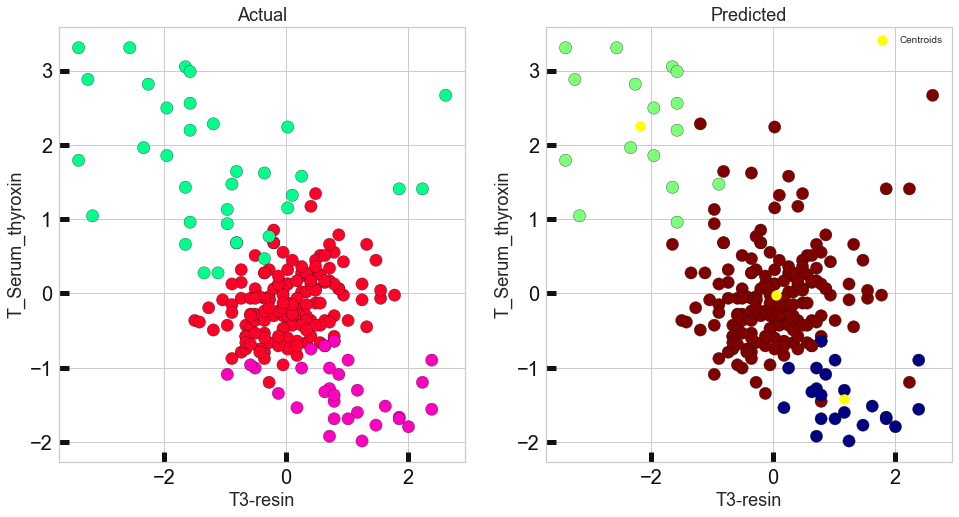

In [22]:
#this will tell us to which cluster does the data observations belong.
new_labels3 = kmeans3.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X3_std[:, 0], X3_std[:, 1], c=y3, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[1], fontsize=18)
axes[0].set_ylabel(columnname[2], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X3_std[:, 0], X3_std[:, 1], c=new_labels3, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[1], fontsize=18)
axes[1].set_ylabel(columnname[2], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(centers3[:, 0], centers3[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [23]:
print(silhouette_score(X3_std, kmeans3.labels_))

0.5988940300692467


# Ecoli

In [24]:
#cargar los datos https://github.com/mikeizbicki/datasets/blob/master/csv/uci/ecoli.names
url="https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"
d4=pd.read_csv(url, sep='[\s,]{2,20}',header=None)

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario
columnname=['Name','mcg','gvh','lip','chg','aac','alm1','alm2','Class']
col_mask=d4.isnull().any(axis=0) 
row_mask=d4.isnull().any(axis=1)
d4.loc[row_mask,col_mask]
df4=np.nan_to_num(d4)
df4 = pd.DataFrame(df4,columns=columnname)
df4.shape
X4 = df4.iloc[:,1:8]#X.shape
y4 = d4.iloc[:,8]

9. Class Distribution. The class is the localization site. Please see Nakai &
		       Kanehisa referenced above for more details.

  cp  (cytoplasm)                                    143  
  im  (inner membrane without signal sequence)        77                 
  pp  (perisplasm)                                    52  
  imU (inner membrane, uncleavable signal sequence)   35  
  om  (outer membrane)                                20  
  omL (outer membrane lipoprotein)                     5  
  imL (inner membrane lipoprotein)                     2  
  imS (inner membrane, cleavable signal sequence)      2  


In [25]:
#Estandarizar
sc4=StandardScaler() 
sc4.fit(X4)
X4_std=sc4.transform(X4) #array

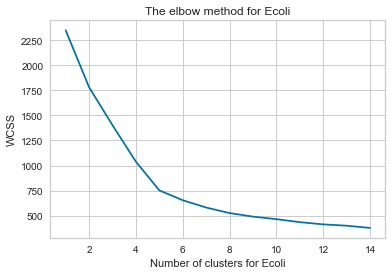

In [26]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 15):
    kmeans4 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans4.fit(X4_std)
    wcss.append(kmeans4.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method for Ecoli')
plt.xlabel('Number of clusters for Ecoli')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

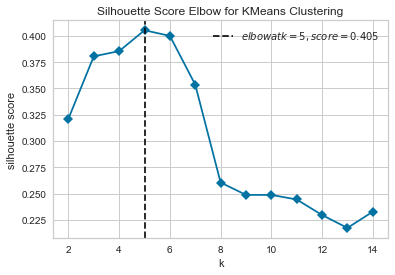

In [27]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans4, k=(2,15), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X4_std)    
visualizer.poof()

In [28]:
y4[y4=='cp']=1
y4[y4=='im']=2
y4[y4=='imL']=7
y4[y4=='imS']=8
y4[y4=='imU']=4
y4[y4=='om']=5
y4[y4=='omL']=6
y4[y4=='pp']=3

Text(0, 0.5, 'gvh')

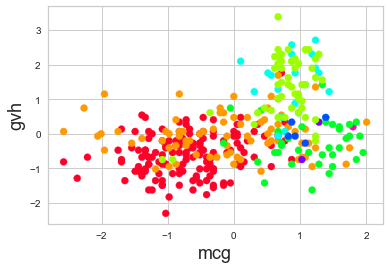

In [29]:
plt.scatter(X4_std[:,0], X4_std[:,1], c=y4, cmap='gist_rainbow')
plt.xlabel(columnname[1], fontsize=18)
plt.ylabel(columnname[2], fontsize=18)

In [30]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans4 = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, n_jobs = 4, random_state=21)
y_kmeans4 = kmeans4.fit_predict(X4_std)
centers4 = kmeans4.cluster_centers_
print('\nCluster centres:')
print(centers4)


Cluster centres:
[[-0.69209176 -0.77454561 -0.17514236 -0.05463584  0.09750669 -1.07877634
  -0.70080649]
 [ 1.06963348 -0.09978562 -0.17514236 -0.05463584  0.5583293   1.22005893
   1.29101926]
 [ 0.87047265  1.43383016 -0.17514236 -0.05463584 -0.59041727 -0.15168997
  -0.71056551]
 [ 1.28607168  0.33798354  5.70964097 18.30300522 -0.81861776 -0.14008527
  -0.95520527]
 [ 0.7886722   0.24034385  5.70964097 -0.05463584  0.53624619  0.62324593
  -0.25909581]
 [-0.77345242 -0.43677873 -0.17514236 -0.05463584 -0.92353753 -0.5542837
  -0.33716798]
 [ 0.89880421  1.29856833 -0.17514236 -0.05463584  2.00692684 -0.20116263
  -0.93758579]
 [-0.66554745 -0.13358397 -0.17514236 -0.05463584  0.43817119  1.19721794
   1.27318003]]


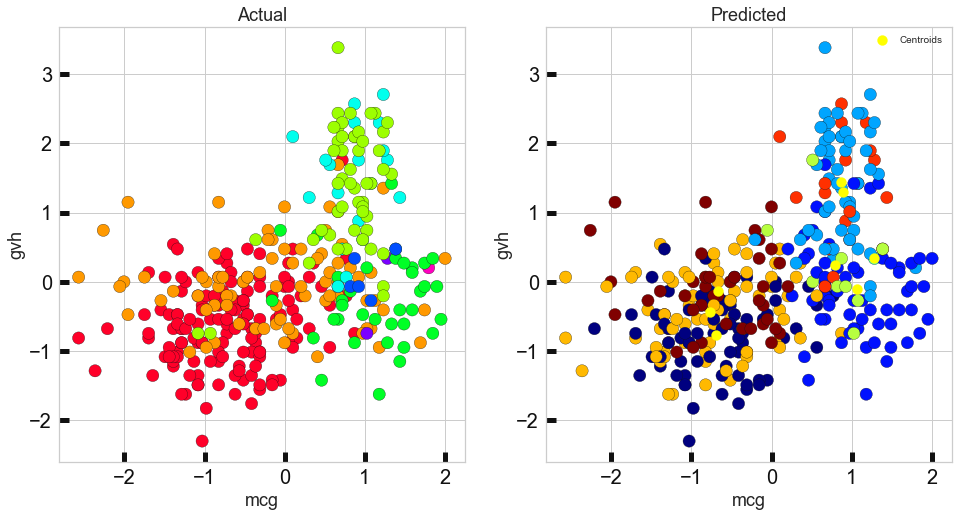

In [31]:
#this will tell us to which cluster does the data observations belong.
new_labels4 = kmeans4.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X4_std[:, 0], X4_std[:, 1], c=y4, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[1], fontsize=18)
axes[0].set_ylabel(columnname[2], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X4_std[:, 0], X4_std[:, 1], c=new_labels4, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[1], fontsize=18)
axes[1].set_ylabel(columnname[2], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(centers4[:, 0], centers4[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [32]:
print(silhouette_score(X4_std, kmeans4.labels_))

0.2620779176425682


# Wine

In [33]:
#cargar los datos https://github.com/mikeizbicki/datasets/blob/master/csv/uci/ecoli.names
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
d5=pd.read_csv(url,header=None)

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario
columnname=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids'
            ,'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
col_mask=d5.isnull().any(axis=0) 
row_mask=d5.isnull().any(axis=1)
d5.loc[row_mask,col_mask]
df5=np.nan_to_num(d5)
df5 = pd.DataFrame(df5,columns=columnname)
df5.shape
X5 = df5.iloc[:,1:] #X.shape
y5 = d5.iloc[:,0]

In [34]:
#Estandarizar
sc5=StandardScaler() 
sc5.fit(X5)
X5_std=sc5.transform(X5) #array

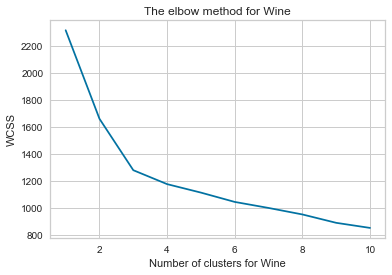

In [35]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans5 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans5.fit(X5_std)
    wcss.append(kmeans5.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for Wine')
plt.xlabel('Number of clusters for Wine')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

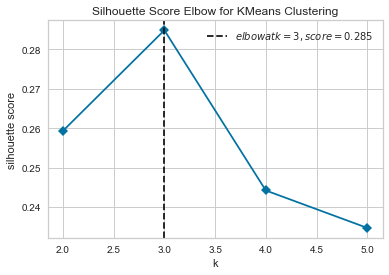

In [36]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans3, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X5_std)    
visualizer.poof()

Text(0, 0.5, 'Proline')

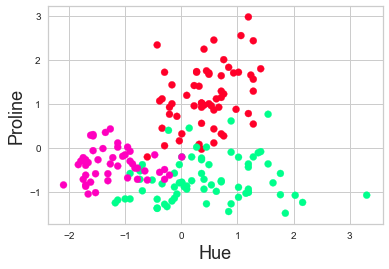

In [37]:
plt.scatter(X5_std[:,10], X5_std[:,12], c=y5, cmap='gist_rainbow')
plt.xlabel(columnname[11], fontsize=18)
plt.ylabel(columnname[13], fontsize=18)

In [38]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans5 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, n_jobs = 4, random_state=21)
y_kmeans5 = kmeans5.fit_predict(X5_std)
centers5 = kmeans5.cluster_centers_
print('\nCluster centres:')
print(centers5)


Cluster centres:
[[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]


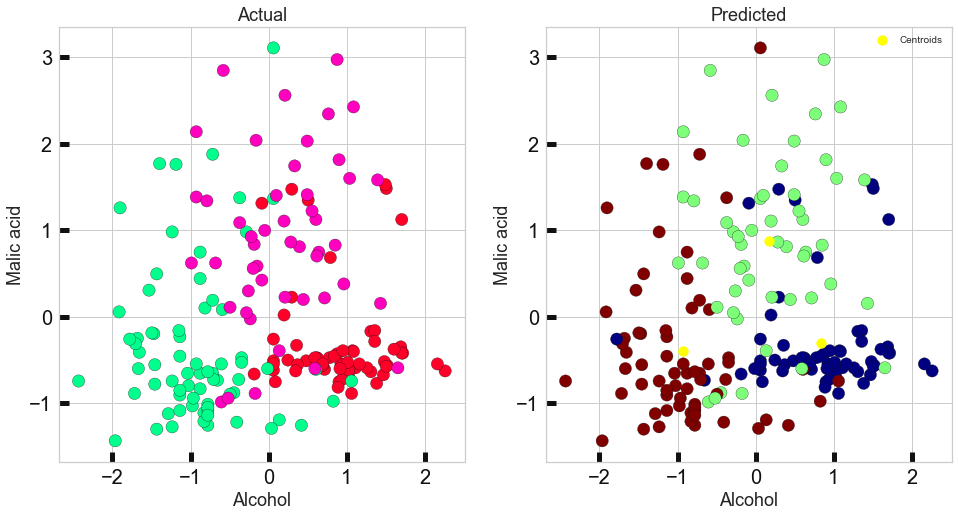

In [39]:
#this will tell us to which cluster does the data observations belong.
new_labels5 = kmeans5.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X5_std[:, 0], X5_std[:, 1], c=y5, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[1], fontsize=18)
axes[0].set_ylabel(columnname[2], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X5_std[:, 0], X5_std[:, 1], c=new_labels5, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[1], fontsize=18)
axes[1].set_ylabel(columnname[2], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(centers5[:, 0], centers5[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [40]:
print(silhouette_score(X5_std, kmeans5.labels_))

0.2848589191898987
